In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

In [3]:
#import libraries
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#save the directory of train images in images
images = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'

folders = os.listdir(images)
print(folders)

['PNEUMONIA', 'NORMAL']


In [5]:
image_data = []
labels = []

label_dict = {
    'PNEUMONIA':0,
    'NORMAL':1   
}

In [6]:
#change the images into an array and save the images and labes in a list called image_data and labels respectively  
from keras.preprocessing import image

for ix in folders:
    path = os.path.join(images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size=((224,224)))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [10]:
print(len(image_data),len(labels))

148 148


In [14]:
#randomize the image_data and labels
import random
combined = list(zip(image_data,labels))
random.shuffle(combined)
image_data[:],labels[:]=zip(*combined)

In [16]:
print(labels)

[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]


In [38]:
#turn the image_data and labels to an array
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(148, 224, 224, 3) (148,)


In [39]:
#encode the y_train(labels)
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(148, 224, 224, 3) (148, 2)


In [40]:
#adjust the way the train images look
from keras.preprocessing.image import ImageDataGenerator

augment = ImageDataGenerator( 
                              rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [41]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [42]:
#inputing the images into the con2d and relu layers
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)       

In [44]:
#the flatten and hidden layers
model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="covid_detection.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)       

In [46]:
#calculating the accuracy and loss of the train and validation dataset
hist = model.fit(x_train,y_train,
                    batch_size=32,
                    epochs = 25,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/25
5/5 [==============================] - 4s 738ms/step - loss: 35.4923 - accuracy: 0.5359 - val_loss: 4.5199 - val_accuracy: 0.7333

Epoch 00001: val_loss improved from inf to 4.51993, saving model to covid_detection.hdf5
Epoch 2/25
5/5 [==============================] - 4s 687ms/step - loss: 3.5450 - accuracy: 0.6362 - val_loss: 1.8108 - val_accuracy: 0.8000

Epoch 00002: val_loss improved from 4.51993 to 1.81079, saving model to covid_detection.hdf5
Epoch 3/25
5/5 [==============================] - 4s 680ms/step - loss: 1.6474 - accuracy: 0.8122 - val_loss: 1.8944 - val_accuracy: 0.7333

Epoch 00003: val_loss did not improve from 1.81079
Epoch 4/25
5/5 [==============================] - 5s 1s/step - loss: 1.8653 - accuracy: 0.7614 - val_loss: 1.5608 - val_accuracy: 0.8667

Epoch 00004: val_loss improved from 1.81079 to 1.56080, saving model to covid_detection.hdf5
Epoch 5/25
5/5 [==============================] - 8s 1s/step - loss: 1.3956 - accuracy: 0.9248 - val_loss: 1.451

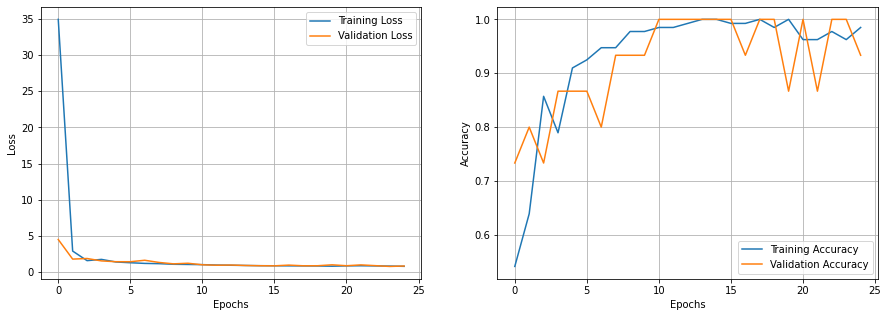

In [47]:
#plot two graphs one for the loss of the train and validation images, the other for the accuracy
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [52]:
#repeat what was done for the train images on the test images
test_images = "../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'PNEUMONIA':0,
    'NORMAL':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((224,224)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        
        
combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)        
        

['PNEUMONIA', 'NORMAL']
(40, 224, 224, 3) (40, 2)


In [54]:
#evaluate the model on the test images
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 59ms/step - loss: 0.9721 - accuracy: 0.9500


[0.9720543026924133, 0.949999988079071]

In [56]:
#make your predictions on the test images and print out the accuracy
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [57]:
print(confusion_matrix(test_labels, pred))

[[20  0]
 [ 2 18]]
